In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the data set 

In [157]:
df = pd.read_csv('/content/gdrive/My Drive/WeCareer/MLCoE_CaseStudy_Dataset.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Check the data set size and some basic information

In [158]:
df.shape

(42538, 144)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 144 entries, id to settlement_term
dtypes: float64(115), object(29)
memory usage: 46.7+ MB


There are 42538 rows and 144 variables. The size of the dataset is 46.7+ MB.
There are 115 samples of type of float64 and 29 sample of type of Object

Let's peek at 5 randomly selected rows. Each row corresponds to a single loan.

In [160]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,1,0.0,42535.000000,42535.000000,42535.000000,42535,42535,42535.000000,42535,42535,39909,41423,42535,4.253100e+04,42535,42535,42535,42535,0.0,29242,42535,42522,42535,42535,42535.000000,42506.000000,42506,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42445,42506.000000,42535,42535.0,42535.0,42535.000000,42535.000000,...,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42535,160,160,160,160.000000,160.000000,160.000000
unique,1,NaN,NaN,NaN,NaN,2,394,NaN,7,35,30658,11,5,NaN,3,55,4,1,NaN,28963,14,21256,837,50,NaN,NaN,530,NaN,NaN,NaN,NaN,NaN,NaN,1119,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,65,3,61,NaN,NaN,NaN
top,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,NaN,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Jun-17,COMPLETE,Oct-13,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,31534,970,NaN,12389,2997,139,9369,20181,NaN,18758,2267,34116,42535,NaN,225,19776,2259,649,7429,NaN,NaN,393,NaN,NaN,NaN,NaN,NaN,NaN,1070,NaN,42535,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42375,18,145,8,NaN,NaN,NaN
mean,NaN,NaN,11089.722581,10821.585753,10139.938785,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,NaN,6.913656e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.373043,0.152449,NaN,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,NaN,22.124406,NaN,0.0,0.0,12020.402023,11312.941076,...,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270.794250,49.889875,1.262500
std,NaN,NaN,7410.938391,7146.914675,7131.598014,NaN,NaN,208.927216,NaN,NaN,NaN,NaN,NaN,6.409635e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.726315,0.512406,NaN,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,NaN,11.592811,NaN,0.0,0.0,9094.872754,9038.629469,...,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.543917,15.569143,4.142869
min,NaN,NaN,500.000000,500.000000,0.000000,NaN,NaN,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#Removing Unneccarly features and Only keep loan features known to potential investors

Since our TARGET value is "loan_status", we want to see what type of values it has and beasically get to know it better

In [162]:
df.loan_status.value_counts(dropna=False)

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
NaN                                                        3
Name: loan_status, dtype: int64

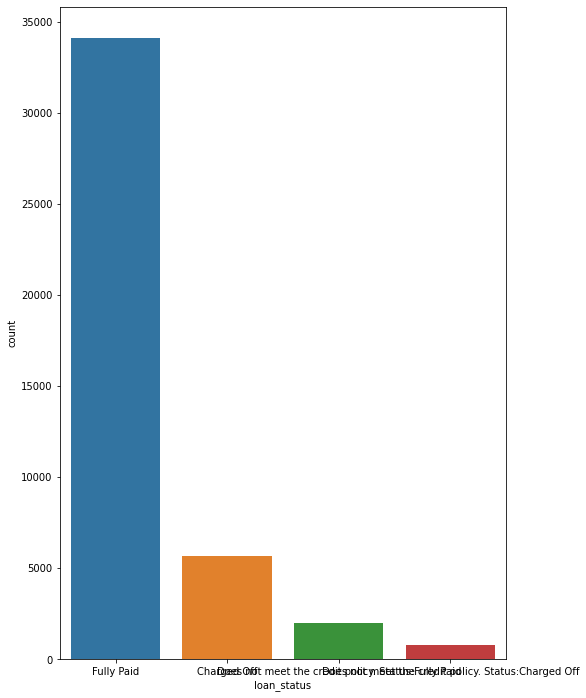

In [163]:
plt.figure(figsize=(8,12))
sns.countplot(df.loan_status)

Note: Since we only care about the "Fully Paid" and "Charged Off" values ( in this model) so we have to remove to other type of loan : Does not meet the credit policy. Status:Fully Paid and Does not meet the credit policy. Status:Charged Off


> Also we will remove the NULL values too and any duplicates row - if any


In [164]:
new_df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off','NaN'])]
new_df.loan_status.isnull().sum()
new_df.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,NaN,NaN,2500.0,2500.0,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,NaN,Our current gutter sy

In [165]:
new_df.shape

(39786, 144)

In [166]:
new_df.loan_status.value_counts(dropna=False)

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

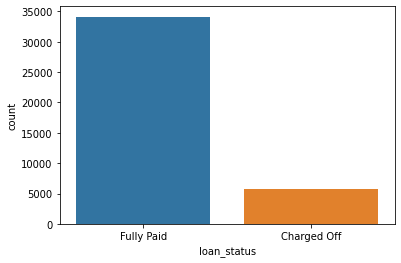

In [167]:
sns.countplot(new_df.loan_status)

About 35000 of the remaining loans have been fully paid and less than 6000 have charged off, so we have a somewhat **unbalanced** classification problem.



The full dataset has 144 features for each loan. We'll select features in two steps:

Drop features with more than 40% of their data missing.
Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan

In [168]:
#4.1 Drop features missing more than 40% data¶
threshold = len(new_df) * .4

new_df = new_df.dropna(thresh= threshold, axis=1)
new_df.shape

(39786, 53)

In [169]:
print(sorted(new_df.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'verification_status', 'zip_code']


For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. I am using my knowledge to select the important feauturs BUT in a reall project we have to comunicate with investor on LendingClub


-- We remove issue_d because is DATE, AND WE CAN NOT HAVE DATE IN THE ML MODEL

In [0]:
selected_feautures = ['addr_state', 'annual_inc', 'application_type', 'dti',
                      'emp_length', 'fico_range_high', 'fico_range_low', 'grade', 
                      'home_ownership', 'initial_list_status', 'installment', 'int_rate',
                      'loan_amnt', 'loan_status', 'mort_acc', 'open_acc',
                      'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
                      'term', 'total_acc', 'verification_status',]

In [0]:
#The list of features to drop is any feature not in keep_list:
new_df.drop(labels= [col for col in new_df.columns if col not in selected_feautures] , axis=1, inplace=True)

In [172]:
new_df.shape

(39786, 21)

#***Analysing and visualizing the data ***

#Correlation



Text(0.5, 1.0, 'Heatmap of all the numeric Features')

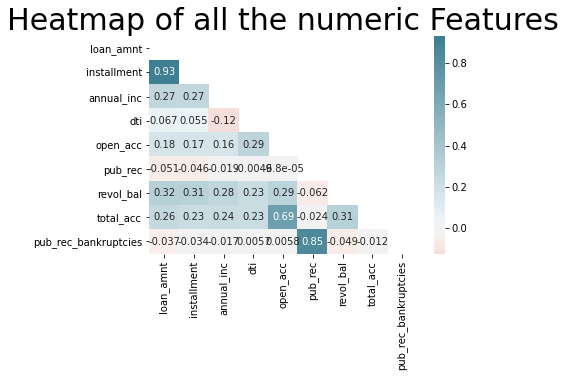

In [173]:
mask = np.zeros_like (new_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(new_df.corr(),
            cmap = sns.diverging_palette(20,220, n= 200),
            mask = mask,
            annot = True,
            center = 0,
)

plt.title("Heatmap of all the numeric Features", fontsize = 30)

Based on this correlation matrix, we can see "pub_rec" is highly corelated to "pub_rec_bankruptcies" and low correlared to "revol_bal". "installment" is highly correlated to "loan_amount" and low correlated to ""pub_rec_bankruptcies


> However the correlation matrix only shows the correlation between NUMERIC variables , so here we still can not say how is the correltionship between Categorical/ Categorical or Categorical/ Numerical variables



In [174]:
new_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

# Lets get more informatio from each variable

**loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [175]:
new_df.loan_amnt.describe()

count    39786.000000
mean     11231.360277
std       7464.542832
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Loan amounts range from 500$  to  35000$. Median amount of loan is  11231$. 
75 per sent of the loan amounts are more than 15000$ 

Since based on Correlation matrix we know there is a strong correlation between loan amount and installment feature , let visualize it

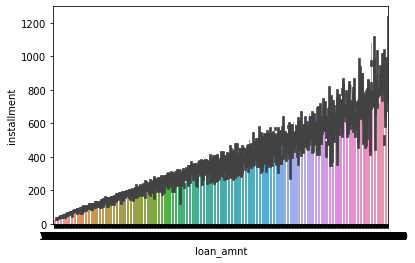

In [145]:
sns.barplot (x= new_df.loan_amnt, y= new_df.installment, data=new_df)

Also let see how loan amount has affect on loan statue (out target value)

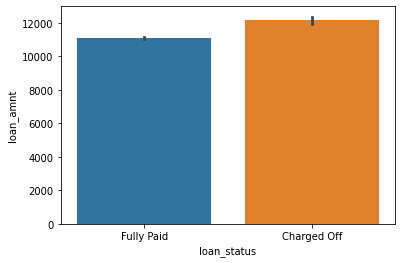

In [176]:
sns.barplot(x= new_df.loan_status, y = new_df.loan_amnt, data=new_df)

Charged-off loans tend to have higher loan amounts.

**************************************************************************************************

**term** : The number of payments on the loan. Values are in months and can be either 36 or 60.


In [177]:
new_df.term.value_counts(dropna=False)

 36 months    29096
 60 months    10690
Name: term, dtype: int64

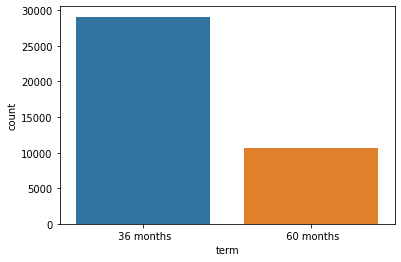

In [28]:
sns.countplot(new_df.term)

the completed loans  that have three-year periods are about more than doubled than completed loans that have five-year periods.

**************************************************************************************************

**int_rate**: "Interest Rate on the loan.

In [178]:
new_df.int_rate.describe()

count      39786
unique       371
top       10.99%
freq         958
Name: int_rate, dtype: object

In [179]:
new_df.int_rate.value_counts()

10.99%    958
13.49%    831
11.49%    826
7.51%     787
7.88%     725
         ... 
16.20%      1
21.48%      1
18.72%      1
17.44%      1
16.01%      1
Name: int_rate, Length: 371, dtype: int64

So we can see that the values of intrest rate is Percentage , but thay type in the data set is Object, so we can convert it to Float64





In [0]:
new_df.int_rate = new_df.int_rate.apply (lambda s:(s[:-1]))
new_df.int_rate = new_df.int_rate.apply (lambda s: np.float64(s))

In [181]:
new_df.int_rate.describe()

count    39786.000000
mean        12.027873
std          3.727466
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

**************************************************************************************************

**loan_status**: Convert loan status to 0/1 charge-off indicator

In [0]:
#Change the response variable loan_status to a 0/1 variable, where 0 indicates fully paid and 1 indicates charge-off:
new_df.loan_status = (new_df.loan_status == 'Fully Paid').apply(np.uint8)

In [183]:
new_df.loan_status.value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

**************************************************************************************************

**emp_length**: 
"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years." 

In [184]:
new_df.emp_length.value_counts(dropna=False)

10+ years    8899
< 1 year     4590
2 years      4394
3 years      4098
4 years      3444
5 years      3286
1 year       3247
6 years      2231
7 years      1775
8 years      1485
9 years      1259
NaN          1078
Name: emp_length, dtype: int64

there are 1078 loans without data on the length of employment.


> So here we can see that, the value should be number since they are presenting the number of years, but theit type in the Data set is Object. So we can just remove the "years" string from the values and then convert the type to int



In [185]:
new_df.emp_length.replace (to_replace='10+ years', value= '10 years', inplace=True)
new_df.emp_length.replace (to_replace= '< 1 year', value='0 years', inplace= True)

def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

new_df.emp_length = new_df.emp_length.apply(emp_length_to_int)

new_df.emp_length.value_counts()

10.0    8899
0.0     4590
2.0     4394
3.0     4098
4.0     3444
5.0     3286
1.0     3247
6.0     2231
7.0     1775
8.0     1485
9.0     1259
Name: emp_length, dtype: int64

**************************************************************************************************

**revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [186]:
new_df.revol_util.describe()

count     39736
unique     1089
top          0%
freq        980
Name: revol_util, dtype: object

So here again we can see the type of feature in the data set is Object, but the actuall value is a number. So here we can just remove the % from the value and convert it to int

In [187]:
new_df.revol_util.value_counts()

0%        980
0.20%      63
63%        62
40.70%     59
66.70%     58
         ... 
25.33%      1
33.26%      1
5.34%       1
36.94%      1
41.85%      1
Name: revol_util, Length: 1089, dtype: int64

In [188]:
def revol_util_to_int(s):
    if isinstance(s, str):

      s = s[:-1]
      return np.float64(s) 
    else:
      return s
      
new_df.revol_util = new_df.revol_util.apply(revol_util_to_int)
new_df.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39781    13.1
39782    26.9
39783    19.4
39784     0.7
39785    51.5
Name: revol_util, Length: 39786, dtype: float64

**************************************************************************************************

**verification_status** : Indicates if income was verified by LC, not verified, or if the income source was verified

In [189]:
new_df.verification_status.value_counts()

Not Verified       16926
Verified           12844
Source Verified    10016
Name: verification_status, dtype: int64

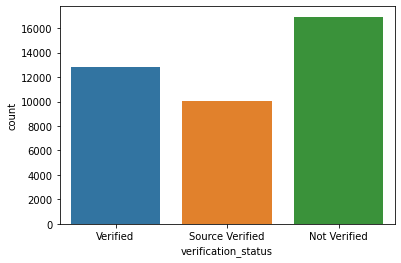

In [190]:
sns.countplot(new_df.verification_status)

#Create dummy variables from the  categorical features

In [191]:
categorical_features = new_df.select_dtypes ('object').columns.to_list()
categorical_features

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [192]:
df_with_dummies = pd.get_dummies(new_df, columns=categorical_features)
df_with_dummies

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,...,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,application_type_Individual
0,5000.0,10.65,162.87,10.0,24000.0,1,27.65,3.0,0.0,13648.0,83.7,9.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2500.0,15.27,59.83,0.0,30000.0,0,1.00,3.0,0.0,1687.0,9.4,4.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2400.0,15.96,84.33,10.0,12252.0,1,8.72,2.0,0.0,2956.0,98.5,10.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,10000.0,13.49,339.31,10.0,49200.0,1,20.00,10.0,0.0,5598.0,21.0,37.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,3000.0,12.69,67.79,1.0,80000.0,1,17.94,15.0,0.0,27783.0,53.9,38.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,8.07,78.42,4.0,110000.0,1,11.33,13.0,0.0,7274.0,13.1,40.0,NaN,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
39782,8500.0,10.28,275.38,3.0,18000.0,1,6.40,6.0,0.0,8847.0,26.9,9.0,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
39783,5000.0,8.07,156.84,0.0,100000.0,1,2.30,11.0,0.0,9698.0,19.4,20.0,NaN,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
39784,5000.0,7.43,155.38,0.0,200000.0,1,3.72,17.0,0.0,85607.0,0.7,26.0,NaN,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [193]:
df_with_dummies.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'term_ 36 months',
       'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_s

#Discover outliers with visualization tools

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

In the process of producing, collecting, processing and analyzing data, outliers can come from many sources and hide in many dimensions. Those that are not a product of an error are called novelties.

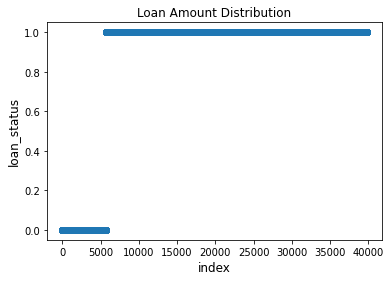

In [194]:
plt.scatter(range(df_with_dummies.shape[0]), np.sort(df_with_dummies.loan_status.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_status', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

#Identifying Outliers with Interquartile Range (IQR), Boc plot and Hist plot

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [195]:
Q1 = df_with_dummies.quantile(0.25)
Q3 = df_with_dummies.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt                       9500.00
int_rate                           5.34
installment                      263.70
emp_length                         7.00
annual_inc                     41842.50
                                 ...   
addr_state_WI                      0.00
addr_state_WV                      0.00
addr_state_WY                      0.00
initial_list_status_f              0.00
application_type_Individual        0.00
Length: 96, dtype: float64


The above output prints the IQR scores, which can be used to detect outliers.

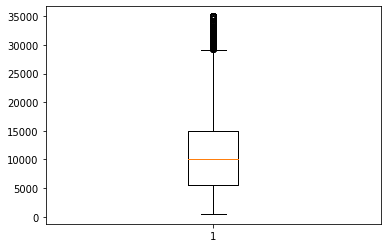

In [196]:
plt.boxplot(df_with_dummies.loan_amnt)
plt.show()

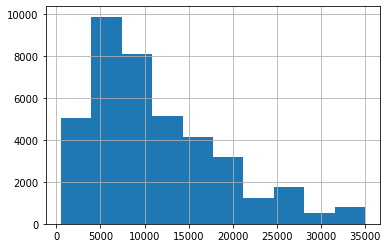

In [197]:
df_with_dummies.loan_amnt.hist()

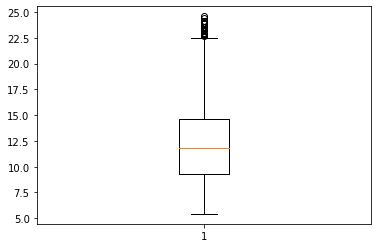

In [198]:
plt.boxplot(df_with_dummies.int_rate)
plt.show()

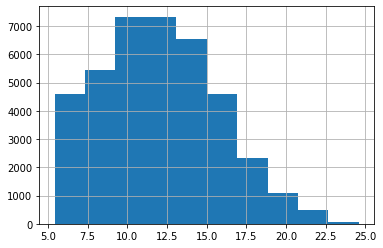

In [199]:
df_with_dummies.int_rate.hist()

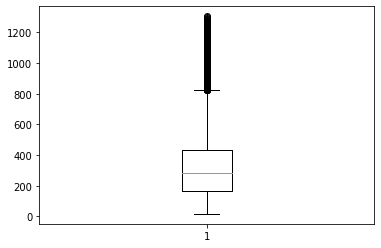

In [200]:
plt.boxplot(df_with_dummies.installment)
plt.show()

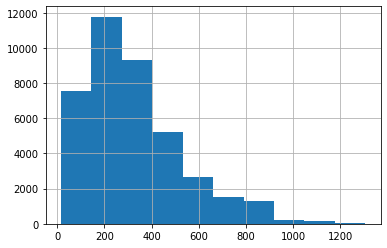

In [201]:
df_with_dummies.installment.hist()

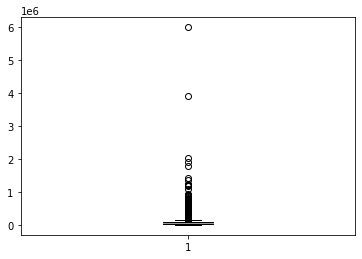

In [202]:
plt.boxplot(df_with_dummies.annual_inc)
plt.show()

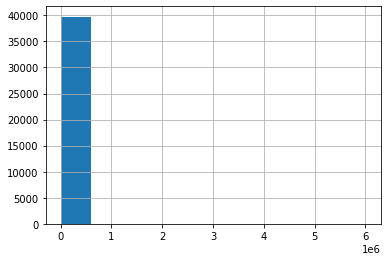

In [203]:
df_with_dummies.annual_inc.hist()

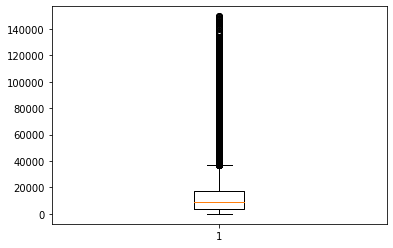

In [204]:
plt.boxplot(df_with_dummies.revol_bal)
plt.show()

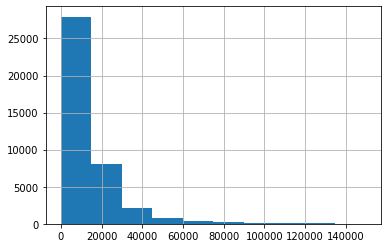

In [205]:
df_with_dummies.revol_bal.hist()

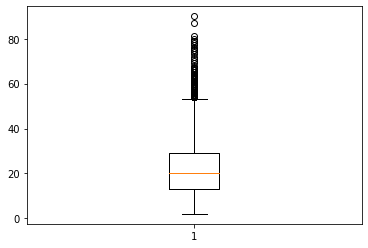

In [206]:
plt.boxplot(df_with_dummies.total_acc)
plt.show()

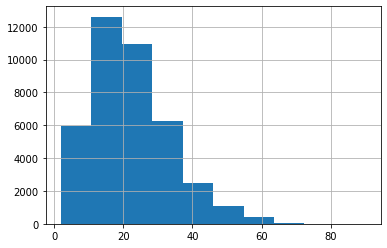

In [207]:
df_with_dummies.total_acc.hist()

#Remove/fix the outliers - **Log transformation**

In [0]:
df_with_dummies.loan_amnt= df_with_dummies.loan_amnt.map(lambda i: np.log(i) if i > 0 else 0) 
df_with_dummies.int_rate = df_with_dummies.int_rate.map(lambda i: np.log(i) if i > 0 else 0)
df_with_dummies.installment = df_with_dummies.installment.map(lambda i: np.log(i) if i > 0 else 0)
df_with_dummies.emp_length = df_with_dummies.emp_length.map(lambda i: np.log(i) if i > 0 else 0)
df_with_dummies.annual_inc = df_with_dummies.annual_inc.map(lambda i: np.log(i) if i> 0 else 0)
df_with_dummies.dti = df_with_dummies.dti.map (lambda i:  np.log(i) if i>0 else 0)
df_with_dummies.open_acc = df_with_dummies.open_acc.map (lambda i : np.log(i) if i>0 else 0)
df_with_dummies.pub_rec = df_with_dummies.pub_rec.map (lambda i: np.log(i) if i>0 else 0)
df_with_dummies.revol_bal = df_with_dummies.revol_bal.map (lambda i : np.log(i) if i>0 else 0)
df_with_dummies.revol_util = df_with_dummies.revol_util.map (lambda i: np.log(i) if i>0 else 0)
df_with_dummies.total_acc = df_with_dummies.total_acc.map (lambda i: np.log(i) if i>0 else 0)
df_with_dummies.pub_rec_bankruptcies = df_with_dummies.pub_rec_bankruptcies.map (lambda i: np.log(i) if i>0 else 0)


In [209]:
Q1 = df_with_dummies.quantile(0.25)
Q3 = df_with_dummies.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt                      1.003302
int_rate                       0.455713
installment                    0.947125
emp_length                     1.504077
annual_inc                     0.709585
                                 ...   
addr_state_WI                  0.000000
addr_state_WV                  0.000000
addr_state_WY                  0.000000
initial_list_status_f          0.000000
application_type_Individual    0.000000
Length: 96, dtype: float64


# **`CREAT THE PIPE LINE`**

We implement machine learning pipelines consisting of one or more of the following steps:



1.   Mean imputation of missing values 
2.   Data standardization: rescaling to zero mean and unit variance
1.   The chosen model


We will evaluate and compare the following models using a cross-validated AUROC score on the training set:
1. Logistic regression with SGD training
2. Random forest
3. k-nearest neighbors
4. Adaboos classifier



# **Strategy to deal with missing values**

Almost always real world data sets have missing values. This can be due, for example, users didn’t fill some part of the forms or some transformations happened while collecting and cleaning the data before they send it to you.

In [210]:
from IPython.display import display_html
import warnings



#determined ht emissing data
def Missing (X):
    total = X.isnull().sum().sort_values(ascending = False)
    percent = round(X.isnull().sum())
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return(missing) 


#plots number of dataframes side by side
def SideSide(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

# Fill empty values with NaN
new_df = new_df.fillna(np.nan)

#finds missing values
missing_df= Missing(df_with_dummies)

    
print('DATA DATA')
SideSide(missing_df)



DATA DATA


,Total,Percent
application_type_Individual,0,0
initial_list_status_f,0,0
home_ownership_OWN,0,0
home_ownership_RENT,0,0
verification_status_Not Verified,0,0
verification_status_Source Verified,0,0
verification_status_Verified,0,0
purpose_car,0,0
purpose_credit_card,0,0
purpose_debt_consolidation,0,0


# Model Training and Testing

We usually split the data around 20%-80% between testing and training stages.


>  training set—a subset to train a model.


>  test set—a subset to test the trained model.





In [212]:
from sklearn.model_selection import train_test_split
X= df_with_dummies.drop('loan_status', axis=1)
y = df_with_dummies.loan_status
X.shape

(39786, 95)

In [213]:
y.shape

(39786,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

#Import Libraries to train the model

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score,recall_score

# Create pipeline for each classification model

SGDClassifier PipeLine

In [0]:
pipline_sgdclassifier = Pipeline([
                                  ('imputer', SimpleImputer(copy=False)),
                                  ('scaler', StandardScaler (copy=False)),
                                  ('model', SGDClassifier (loss = 'log', max_iter=100, tol = 1e-3, random_state=1, warm_start=True))
                              
])

In [0]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [0]:
grid_sgdlogreg = GridSearchCV(estimator=pipline_sgdclassifier, param_grid=param_grid_sgdlogreg, 
                              scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

Random Forest Classifire PipeLine

In [0]:
pipeline_rfc = Pipeline([
                         ('imputer', SimpleImputer(copy=False)),
                         ('scaler', StandardScaler(copy=False)),
                         ('model', RandomForestClassifier (
                                                           criterion ='gini',
                                                           max_features = 'sqrt',
                                                           min_samples_leaf = 5,
                                                           class_weight = 'balanced'))
])

param_grid_rfc = {'model__n_estimators': [100]}

In [0]:
grid_rfc = GridSearchCV(estimator= pipeline_rfc, param_grid= param_grid_rfc, scoring= 'roc_auc',
                        n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

KNeighborsClassifier PipeLine

In [0]:
pipeline_knn = Pipeline([
                         ('inputer', SimpleImputer(copy=False)),
                         ('scaler', StandardScaler(copy=False)),
                         ('lda', LinearDiscriminantAnalysis()),
                         ('model', KNeighborsClassifier(n_jobs=-1))
])

param_grid_knn = {
    'model__n_neighbors': [5,15,25],
    'lda__n_components': [3,9]

}

In [0]:
grid_knn = GridSearchCV (estimator= pipeline_knn, param_grid= param_grid_knn, scoring= 'roc_auc',
                         pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

AdaBoostClassifier PipeLine

In [0]:
pipeline_adb = Pipeline([
                         ('inputer', SimpleImputer(copy=False)),
                         ('scaler', StandardScaler (copy=False)),
                         ('model', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm='SAMME.R'))
])

param_grid_adb = {
    'model__n_estimators':[200],
    'model__learning_rate': [0.3,0.5]
}

In [0]:
grid_adb = GridSearchCV (estimator=pipeline_adb, param_grid=param_grid_adb, scoring='roc_auc',
                         pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

# Fit each model

In [225]:
# Fit SGDClassifier
grid_sgdlogreg.fit(X_train,y_train)
print ('SGDClassifier is Done')

# Fit RandomForest Classifier
grid_rfc.fit (X_train, y_train)
print ('RandomForestClassifier is Done')

# # Fit KNeighborsClassifier
grid_knn.fit (X_train, y_train)
print ('KNeighborsClassifier is Done')

# # Fit AdaBoostClassifier
grid_adb.fit (X_train, y_train)
print ('AdaBoostClassifier is Done')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   27.1s finished


SGDClassifier is Done
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.1s finished


RandomForestClassifier is Done
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(95, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(95, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dis

KNeighborsClassifier is Done
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished


AdaBoostClassifier is Done


# ERROR ANALYSIS


1.   AURUC Score
2.   F1 Score
2.   Confusion Matrix 
2.   Precision_score
2.   Recall_score




> **AURUC Score:**
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. A perfect classifier will have ROC AUC  equal to 1, whereas a purlely random classifier will have ROC AUC equal to 0.5

> **Confusion Matrix**:  (row represents an actual class, columns represent a predicted class)

> **precision** :(also called positive predictive value) is the fraction of relevant instances among the retrieved instances

> **recall:**(also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved

> **F1:** A measure that combines precision and recall is the harmonic mean of precision and recall

In addition, with classification problems where False Negatives are a lot more expensive than False Positives, we may want to have a model with a high recall rather than high precision. Below is the confusion matrix:

In [0]:
y_train_rfc_predicted = grid_rfc.predict(X_train)
y_train_knn_predicted = grid_knn.predict(X_train)
y_train_adb_predicted = grid_adb.predict(X_train)
y_train_sgd_predicted = grid_sgdlogreg.predict(X_train)

In [229]:
# SGDClassifier SCORE
print("SGDClassifier Score: \n")
print("AURUC Score:\t\t ", grid_sgdlogreg.best_score_, "\n")
print("F1 Score:\t\t ", f1_score(y_train, y_train_sgd_predicted), "\n")
print("Precision Score:\t\t ", precision_score(y_train, y_train_sgd_predicted), "\n")
print("Recall Score:\t\t ", recall_score(y_train, y_train_sgd_predicted), "\n")
print("confusion_matrix Score:\t\t ", confusion_matrix(y_train,y_train_sgd_predicted), "\n\n\n")


# RandomForestClassifier SCORE
print("RandomForestClassifier Score: \n")
print("AURUC Score:\t\t ", grid_rfc.best_score_, "\n")
print("F1 Score:\t\t ", f1_score(y_train, y_train_rfc_predicted), "\n")
print("Precision Score:\t\t ", precision_score(y_train, y_train_rfc_predicted), "\n")
print("Recall Score:\t\t ", recall_score(y_train, y_train_rfc_predicted), "\n")
print("confusion_matrix Score:\t\t ", confusion_matrix(y_train,y_train_rfc_predicted), "\n\n\n")

# KNeighborsClassifier SCORE
print("KNeighborsClassifier Score: \n")
print("AURUC Score:\t\t ", grid_knn.best_score_, "\n")
print("F1 Score:\t\t ", f1_score(y_train, y_train_knn_predicted), "\n")
print("Precision Score:\t\t ", precision_score(y_train, y_train_knn_predicted), "\n")
print("Recall Score:\t\t ", recall_score(y_train, y_train_knn_predicted), "\n")
print("confusion_matrix Score:\t\t ", confusion_matrix(y_train,y_train_knn_predicted), "\n\n\n")

# AdaBoostClassifier SCORE
print("AdaBoostClassifier Score: \n")
print("AURUC Score:\t\t ", grid_adb.best_score_, "\n")
print("F1 Score:\t\t ", f1_score(y_train, y_train_adb_predicted), "\n")
print("Precision Score:\t\t ", precision_score(y_train, y_train_adb_predicted), "\n")
print("Recall Score:\t\t ", recall_score(y_train, y_train_adb_predicted), "\n")
print("confusion_matrix Score:\t\t ", confusion_matrix(y_train,y_train_adb_predicted), "\n\n\n")

SGDClassifier Score: 

AURUC Score:		  0.6928254186841778 

F1 Score:		  0.9226286275772103 

Precision Score:		  0.8572058175407669 

Recall Score:		  0.9988628443564066 

confusion_matrix Score:		  [[   31  4536]
 [   31 27230]] 



RandomForestClassifier Score: 

AURUC Score:		  0.6861808640420888 

F1 Score:		  0.959861359570662 

Precision Score:		  0.9754573343938189 

Recall Score:		  0.9447562451854298 

confusion_matrix Score:		  [[ 3919   648]
 [ 1506 25755]] 



KNeighborsClassifier Score: 

AURUC Score:		  0.6523085291443617 

F1 Score:		  0.9227923080839797 

Precision Score:		  0.8587086992229452 

Recall Score:		  0.9972121345511904 

confusion_matrix Score:		  [[   94  4473]
 [   76 27185]] 



AdaBoostClassifier Score: 

AURUC Score:		  0.6939360433766597 

F1 Score:		  0.9227171831845061 

Precision Score:		  0.8574127723894697 

Recall Score:		  0.9987894794761748 

confusion_matrix Score:		  [[   39  4528]
 [   33 27228]] 





#Tune hyperparameters on the chosen model 
The 4 models performed quite similarly according to the AUROC:
AdaBoosClassifier squeaked out ahead, and coupled with the fact that AdaBoosClassifier trains much faster than the other two models, we'll select AdaBoosClassifier as our final model. Now we'll tune the hyperparameters more finely.



In [230]:
grid_adb.best_estimator_

Pipeline(memory=None,
         steps=[('inputer',
                 SimpleImputer(add_indicator=False, copy=False, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=False, with_mean=True, with_std=True)),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=1,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                     

In [231]:
grid_adb.best_params_

{'model__learning_rate': 0.3, 'model__n_estimators': 200}

In [0]:
param_grid_adb_tuned = {
    'model__n_estimators':[200,300],
    'model__learning_rate': [0.3,0.5]
}

In [0]:
grid_adb_tuned = GridSearchCV(estimator=pipeline_adb, param_grid=param_grid_adb_tuned, 
                              scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [234]:
grid_adb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('inputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=False,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                       

In [235]:
grid_adb_tuned.best_score_

0.6939360433766597

Tuning the model did not make any chnages

#Test set evaluation

In [236]:
from sklearn.metrics import roc_auc_score

y_test_predict = grid_adb_tuned.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_test_predict)


0.6918480399255924

The test set AUROC score is somewhat lower than the cross-validated score .

# Conclusion

We applied machine learning methods to predict the probability that a requested loan will charge off. After training and evaluating 4 different models (logistic regression, random forest, Adaboos crassifier, and k-nearest neighbors), we found that all 4 performed similarly according to a cross-validated AUROC score on the training data. We selected AdaBoostClassifier because it was the fastest model to train, and this model obtained an AUROC score of 0.6918480399255924 on a test set.





*   There is no definitive guide of which algorithms to use given any situation. What may work on some data sets may not necessarily work on others. Therefore, always evaluate methods using cross validation to get a reliable estimates.
*   Sometimes we may be willing to give up some improvement to the model if that would increase the complexity much more than the percentage change in the improvement to the evaluation metrics.


*   In some classification problems, False Negatives are a lot more expensive than False Positives. Therefore, we can reduce cut-off points to reduce the False Negatives.
*   When we building ensemble models, we try to use good models that are as different as possible to reduce correlation between the base learners.

*   EasyEnsemble usually performs better than any other resampling methods











